In [75]:
import numpy as np
import matplotlib.pyplot as plt

83.33333333333333


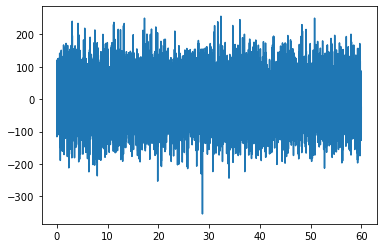

71.42827605276787


In [76]:
''' DT = 1 minute '''
''' dt = 0.006 s  '''

DT     = 60
ntsamp = 10000
time   = np.linspace(0,DT,ntsamp)
dt     = Dt/ntsamp
fs     = 1/dt

fmax   = fs/2
print(fmax)

''' df = 0.01 Hz  '''


func = 0

for idx in range(10000):
    phase = np.random.rand()*2*np.pi
    freq  = (idx+1)/100
    amplitude = 1#freq**(-0.6) 
    func += amplitude * np.sin(2*np.pi*freq*time + phase)
    

plt.plot(time, func)
plt.show()

print(np.std(func))

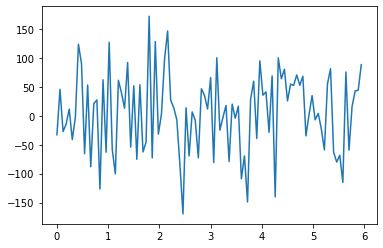

69.27578096945994


In [77]:
idxes = np.arange(0,1000,10)
func_resamp = func[idxes]

plt.plot(time[idxes], func_resamp)
plt.show()

print(np.std(func_resamp))

In [78]:
#not resamp; average!

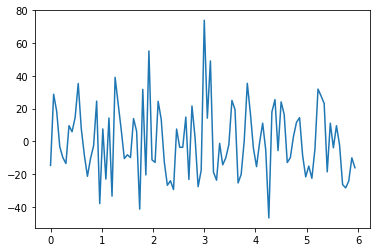

21.718306848258607


In [79]:
func_reavg = []

step  = 10
idxes = np.arange(0,1000,step)

for idx in idxes:
    func_reavg.append(np.mean(func[idx:idx+step]))
                      
plt.plot(time[idxes], func_reavg)
plt.show()

print(np.std(func_reavg))

In [80]:
''' DT = 1 minute '''

Dt     = 60 #s
fs     = 200 #Hz
dt     = 1/fs
ntsamp = int(Dt/dt)
time   = np.linspace(0,Dt,ntsamp)

fmax   = fs/2
fmin   = 1/Dt
print('max reconstructible frequency: ', fmax)
print('min reconstructible frequency: ', fmin)

nfreqs = 10000
freqs  = np.linspace(fmin, fmax, nfreqs)

print(freqs)

amplitude = np.ones(len(freqs))
func = np.sum( amplitude * np.sin(2* np.pi * ( np.outer(time, freqs) + np.random.rand(len(freqs)) ) ), axis = 1 )

max reconstructible frequency:  100.0
min reconstructible frequency:  0.016666666666666666
[1.66666667e-02 2.66659999e-02 3.66653332e-02 ... 9.99800013e+01
 9.99900007e+01 1.00000000e+02]


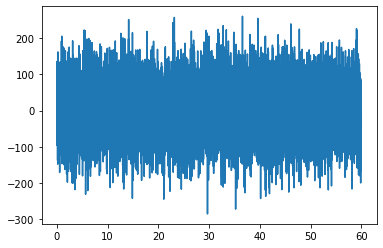

[ 97.79111841   7.99305817  -3.88313806 ...  37.19072477  51.87122499
 -45.14311433]
70.73672302535805


In [81]:
plt.plot(time, func, '-')
plt.show()

print(func)

print(np.std(func))


/Users/pai/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


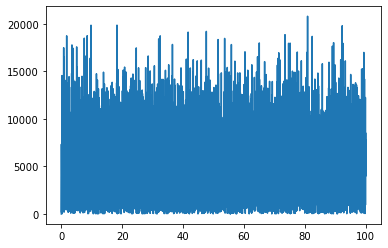

In [94]:
func_fft = np.fft.rfft(func)/(np.sqrt(len(func)))
freq_fft = np.fft.rfftfreq(len(func), dt)
plt.plot(freq_fft, func_fft*np.conj(func_fft))
plt.show()

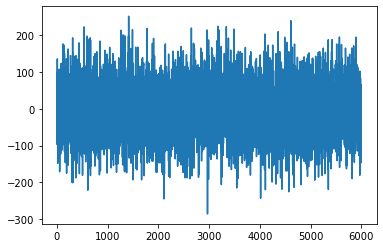

70.7838367750138


In [97]:
''' resample with improper fs '''

fs_2 = 100 #Hz 
dt_2 = 1/fs_2
ntsamp_2 = int(Dt/dt_2)
time_2   = np.linspace(0,Dt,ntsamp_2)
samp_fac = int(ntsamp/ntsamp_2)

func_resamp = func[::samp_fac]

plt.plot(func_resamp)
plt.show()

print(np.std(func_resamp))

/Users/pai/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/pai/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


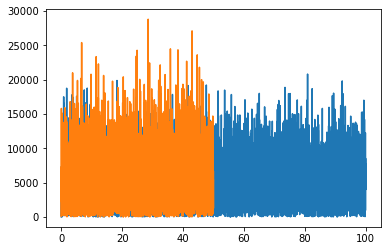

In [98]:
func_fft_2 = np.fft.rfft(func_resamp)/(np.sqrt(len(func_resamp)))
freq_fft_2 = np.fft.rfftfreq(len(func_resamp), dt_2)
plt.plot(freq_fft, func_fft*np.conj(func_fft))
plt.plot(freq_fft_2, func_fft_2*np.conj(func_fft_2))
plt.show()

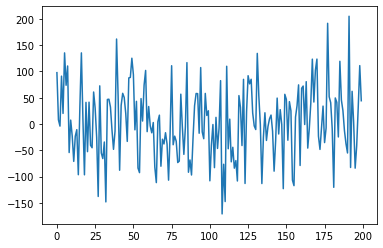

69.08837912921601


In [105]:
''' diminish frequency resolution '''

Dt_3 = 1 #s
ntsamp_3 = int(Dt_3/dt)
time_3   = np.linspace(0,Dt_3,ntsamp_3)
shape_fac = int(Dt/Dt_3)

func_reshape = func[:int(len(func)/shape_fac)]

plt.plot(func_reshape)
plt.show()

print(np.std(func_reshape))

/Users/pai/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/pai/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


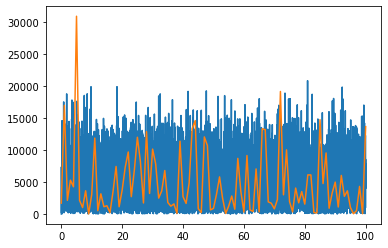

In [106]:
func_fft_3 = np.fft.rfft(func_reshape)/(np.sqrt(len(func_reshape)))
freq_fft_3 = np.fft.rfftfreq(len(func_reshape), dt)
plt.plot(freq_fft, func_fft*np.conj(func_fft))
plt.plot(freq_fft_3, func_fft_3*np.conj(func_fft_3))
plt.show()

In [107]:
print(np.mean(func_fft.real), np.mean(func_fft.imag))
print(np.mean(func_fft_3.real), np.mean(func_fft_3.imag))

0.8853542151106806 -0.5343011206041915
6.471918197439431 0.3502204217999587
